# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

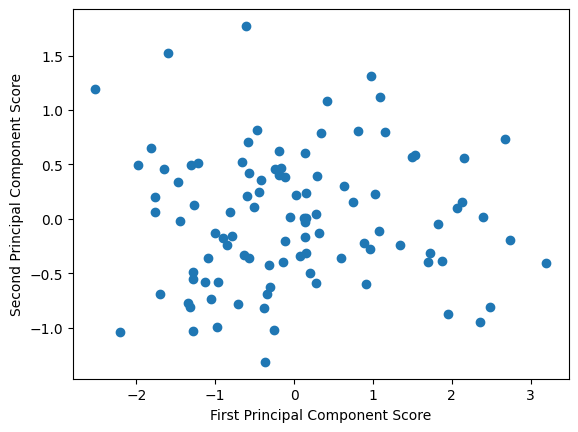

In [86]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

The three outliers likely have low PC1 scores and high PC2 scores. It’s likely that series_3 is contributing heavily to PC2, which explains why those points are outliers only in the Y direction (PC2). If series_3 has high positive values, it would push PC2 scores high.

But since PC1 is a mix of all three variables and series_1 and series_2 may be correlated, their individual contributions get entangled in PC1, making it hard to isolate their effects.

Some advantages are showing variance structure in lower dimensions, which is great for dimensionality reduction. It helps identify outliers (like the three points).

Some disadvantages and it is hard to interpret individual variable effects without knowing the loadings. Also, doesn’t directly show original variable values, some nuance is lost.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [87]:
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv("IRENA_RenewableEnergy_Statistics_2000-2022.csv", encoding = 'latin -1')

# Peek at the data
print(df.shape)
print(df.columns)
df.head()


(35193, 12)
Index(['Region', 'Sub-region', 'Country', 'ISO3 code', 'M49 code',
       'RE or Non-RE', 'Group Technology', 'Technology', 'Producer Type',
       'Year', 'Electricity Generation (GWh)',
       'Electricity Installed Capacity (MW)'],
      dtype='object')


,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
0,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2000,24585.0,5459.01
1,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2001,25781.0,5455.50
2,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2002,26994.0,5891.01
3,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2003,28619.4,6013.24
4,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2004,30312.0,6305.24


In [88]:
df_numeric = df[['Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)', 'Year']].dropna()
df_numeric.corr()

,Electricity Generation (GWh),Electricity Installed Capacity (MW),Year
Electricity Generation (GWh),1.000000,0.958447,-0.000103
Electricity Installed Capacity (MW),0.958447,1.000000,0.012387
Year,-0.000103,0.012387,1.000000


It is interesting. Year has close to no relation with other two variables. Electricity capacity and generation are highly correlated. Doing PCA on these two variables will be most beneficial. 

Text(0.5, 1.0, 'Heatmap of Electricity Production by Region and Technology Group')

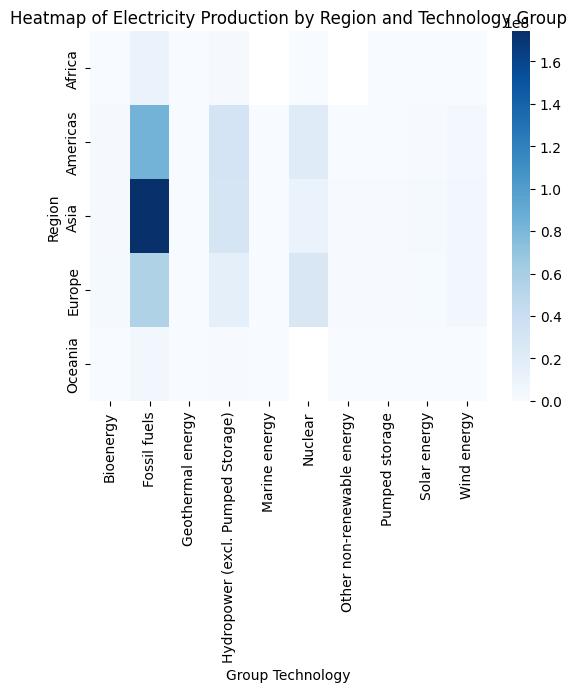

In [89]:
#The data are given as columns, so we must use a pivot_table to transform it into a two-dimensional grid.
pivot = df.pivot_table(index = ["Region"], columns = ["Group Technology"], values = "Electricity Generation (GWh)", aggfunc = "sum")

df_hmap = sns.heatmap(pivot, cmap = "Blues")
df_hmap.set_title("Heatmap of Electricity Production by Region and Technology Group")

Heatmap shows Asia to be the highest electricity producer with fossil fuel. 

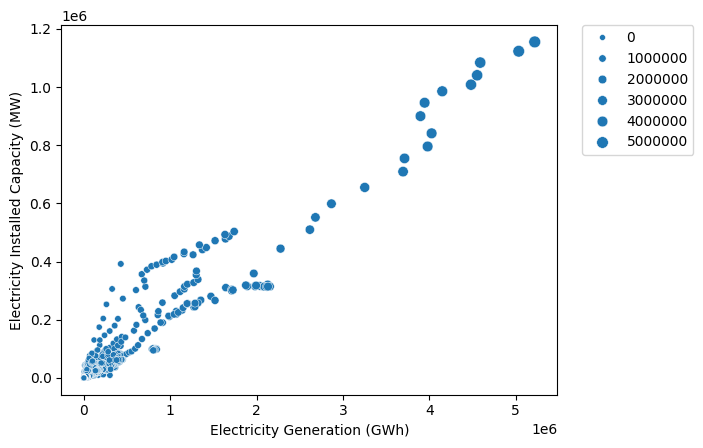

<Figure size 1000x600 with 0 Axes>

In [90]:
# Bubble plot of three numeric values

ax = sns.scatterplot(data = df, x = "Electricity Generation (GWh)", y = "Electricity Installed Capacity (MW)", size = "Electricity Generation (GWh)")

plt.figure(figsize=(10, 6))
ax.set_xlabel("Electricity Generation (GWh)")
ax.set_ylabel("Electricity Installed Capacity (MW)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

Capacity and production are highly correlated. 

Variance explained by first component: 0.9792232963155831


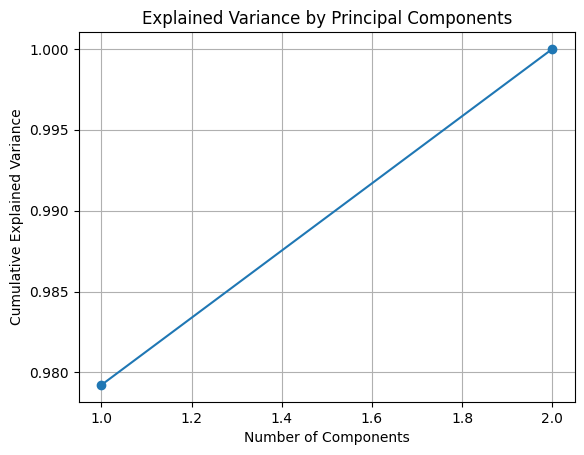

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

# Subset and scale the numeric data
df_numeric = df[['Electricity Generation (GWh)', 'Electricity Installed Capacity (MW)']].dropna()

X = df_numeric
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained
explained_variance = pca.explained_variance_ratio_
print("Variance explained by first component:", explained_variance[0])

# Plot cumulative variance
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()



As predicted above, PCA 1 would explain most variance.  

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Try predicting one feature using others
X = df_numeric[['Electricity Installed Capacity (MW)']]  
y = df_numeric['Electricity Generation (GWh)']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate R² and RMSE
print("R^2 Score:", r2_score(y_test, y_pred))

# Calculate RMSE manually
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)



R^2 Score: 0.9269538469528221
RMSE: 34190.59019744502


Which means the model is explaining around 93% of the variance in the data. This is a solid result for a linear regression model.

Renewable energy production trends generally increase over time — we expect this. Some countries or regions show surprising patterns/outliers (e.g., dips due to policy changes or disasters).

In general, we can predict accurately using just Electricity Installed Capacity (MW) and Electricity Generation (GWh) dimensions

In [93]:
import pandas as pd

# This is the dataset for Evolution of Modern Renewable Energy (1965–2021)

# Load the dataset
df_ren2 = pd.read_csv("02 modern-renewable-energy-consumption.csv", encoding = 'latin -1')

# Peek at the data
print(df_ren2.shape)
print(df_ren2.columns)
df_ren2.head()

(5610, 7)
Index(['Entity', 'Code', 'Year', 'Geo Biomass Other - TWh',
       'Solar Generation - TWh', 'Wind Generation - TWh',
       'Hydro Generation - TWh'],
      dtype='object')


,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,Africa,NaN,1971,0.164,0.0,0.0,26.013390
1,Africa,NaN,1972,0.165,0.0,0.0,29.633196
2,Africa,NaN,1973,0.170,0.0,0.0,31.345707
3,Africa,NaN,1974,0.175,0.0,0.0,35.667076
4,Africa,NaN,1975,0.172,0.0,0.0,37.717968


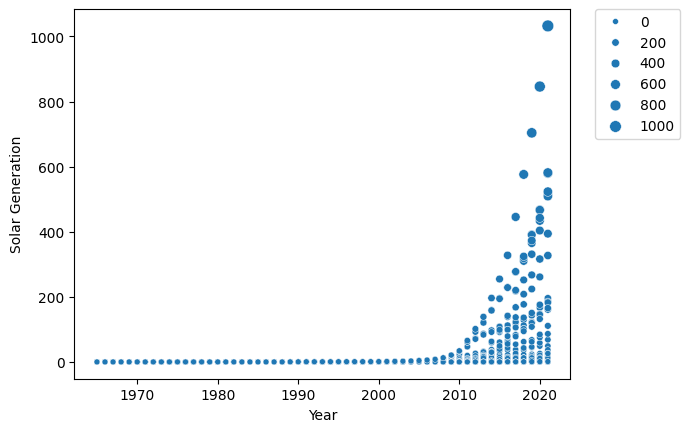

<Figure size 1000x600 with 0 Axes>

In [94]:
#My dataset lacks two categorical variables. So, I am only doing a bubble plot here.df_ren2
# Bubble plot of three numeric values

ax = sns.scatterplot(data = df_ren2, x = "Year", y = "Solar Generation - TWh", size = "Solar Generation - TWh")

plt.figure(figsize=(10, 6))
ax.set_xlabel("Year")
ax.set_ylabel("Solar Generation")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show() 

The bubble chart above shows that overtime solar energy generation increased exponentially over the past 5 - 10 years. 

In [95]:
df_ren2_numeric.corr()

,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
Solar Generation - TWh,1.000000,0.944557,0.533779
Wind Generation - TWh,0.944557,1.000000,0.631011
Hydro Generation - TWh,0.533779,0.631011,1.000000


According to the analysis above, it looks year has little correlation with various energy production. It is not a good variable to use for prediction. It will be removed below.

Variance explained by first component: 0.8074031201466246


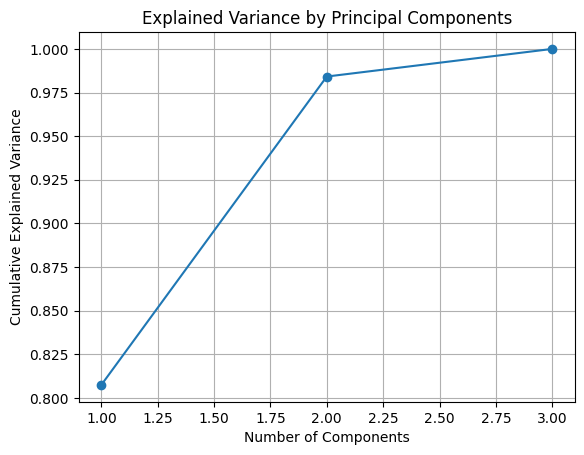

In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

# Subset and scale the numeric data
df_ren2_numeric = df_ren2[['Solar Generation - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh']].dropna()

X = df_ren2_numeric
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained
explained_variance = pca.explained_variance_ratio_
print("Variance explained by first component:", explained_variance[0])

# Plot cumulative variance
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

This PCA analysis shows that first two component explains about 99% of the variance. I could probably reduce data to 2 components without losing much information. In the correlation analysis earlier, it looked like hydro generation has a weaker relationship with both solar and wind. Getting rid of hydro would improve the data model.  

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Try predicting one feature using others
X = df_ren2_numeric[['Wind Generation - TWh']]  
y = df_ren2_numeric['Solar Generation - TWh']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate R² and RMSE
print("R^2 Score:", r2_score(y_test, y_pred))

# Calculate RMSE manually
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


R^2 Score: 0.8472391020661859
RMSE: 12.75891337685023


This is a good score for a model. It shows the model is not overfitting. I am intrigued by hydro energy not having as strong relationship as solar and wind. It needs to be investigated further.   

In [110]:
# This is the dataset for U.S. Energy Generation (2001–2022) 
%pip install openpyxl

# Load the dataset
df_ren3 = pd.read_excel("US_Gen.xlsx")

# Randomly sample 20,000 rows
df_ren3 = df_ren3.sample(n=40000, random_state=42).reset_index(drop=True)

df_ren3= df_ren3.drop(columns=['Unnamed: 0'])

# Peek at the data
print(df_ren3.shape)
print(df_ren3.columns)
df_ren3.head()


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
(40000, 6)
Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (Megawatthours)'],
      dtype='object')


,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,2007,11,IL,"Electric Generators, Independent Power Producers",Petroleum,7499.00
1,2021,12,FL,"Combined Heat and Power, Electric Power",Wood and Wood Derived Fuels,0.00
2,2001,4,PA,Total Electric Power Industry,Hydroelectric Conventional,306704.00
3,2011,2,DC,"Electric Generators, Electric Utilities",Total,4250.41
4,2017,12,NH,"Electric Generators, Electric Utilities",Coal,109212.00


In [111]:
df_ren3_numeric = df_ren3[['YEAR', 'GENERATION (Megawatthours)']]
df_ren3_numeric.corr()


,YEAR,GENERATION (Megawatthours)
YEAR,1.000000,-0.013583
GENERATION (Megawatthours),-0.013583,1.000000


Basically no correlation between these two variables. Since there are a few categorical varaibles, let's do a heatmap. 

Text(0.5, 1.0, 'Heatmap of Electricity Production by Type of Producer and Energy Source')

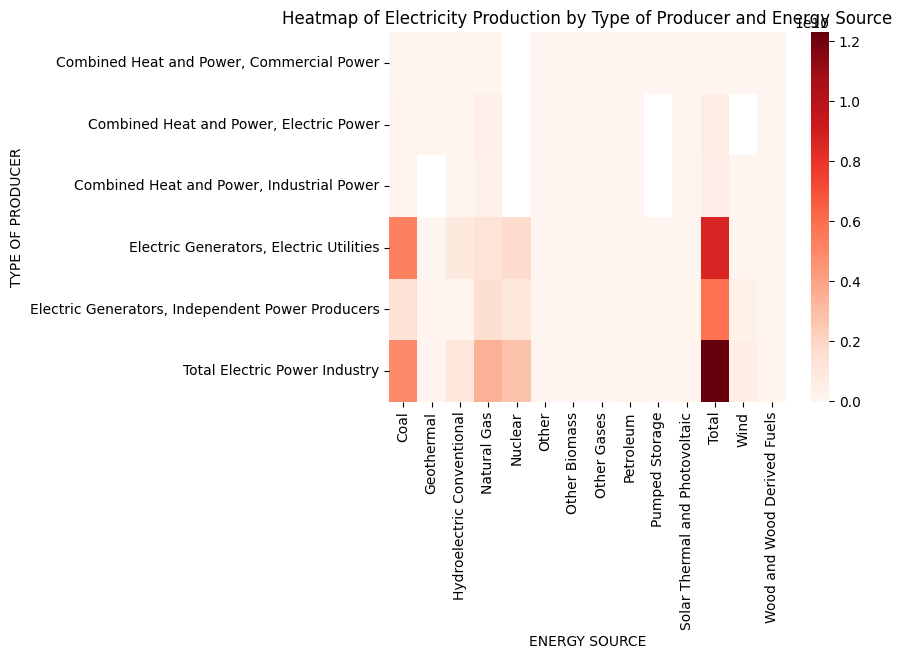

In [112]:
#The data are given as columns, so we must use a pivot_table to transform it into a two-dimensional grid.
pivot = df_ren3.pivot_table(index = ["TYPE OF PRODUCER"], columns = ["ENERGY SOURCE"], values = "GENERATION (Megawatthours)", aggfunc = "sum")

df_hmap = sns.heatmap(pivot, cmap = "Reds")
df_hmap.set_title("Heatmap of Electricity Production by Type of Producer and Energy Source")

The heatmap above shows our reliance on coal and natural gas for electricity production. 

Variance explained by first component: 0.28071108195186323


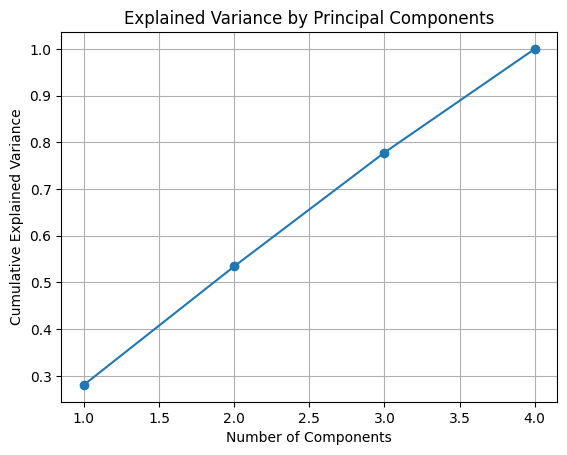

In [114]:
#Perform PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

# Subset and scale the numeric data
df_ren3_0 = df_ren3[['GENERATION (Megawatthours)', 'ENERGY SOURCE', 'TYPE OF PRODUCER', 'STATE']].dropna()

# Encode categorical variables
le_country = LabelEncoder()
le_tech = LabelEncoder()
df_ren3_0['ENERGY SOURCE'] = le_tech.fit_transform(df_ren3['ENERGY SOURCE'])
df_ren3_0['TYPE OF PRODUCER'] = le_tech.fit_transform(df_ren3['TYPE OF PRODUCER'])
df_ren3_0['STATE'] = le_tech.fit_transform(df_ren3['STATE'])

X = df_ren3_0
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained
explained_variance = pca.explained_variance_ratio_
print("Variance explained by first component:", explained_variance[0])

# Plot cumulative variance
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

Very poor performance. Let's try again by removing state

Variance explained by first component: 0.3614559948060856


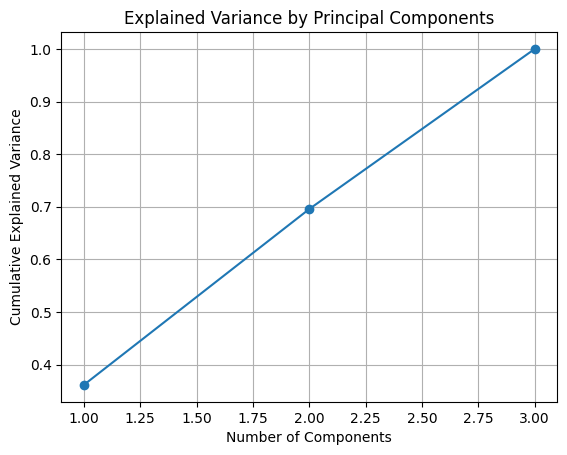

In [115]:
#Perform PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

# Subset and scale the numeric data
df_ren3_1 = df_ren3[['GENERATION (Megawatthours)', 'ENERGY SOURCE', 'TYPE OF PRODUCER']].dropna()

# Encode categorical variables
le_country = LabelEncoder()
le_tech = LabelEncoder()
df_ren3_1['ENERGY SOURCE'] = le_tech.fit_transform(df_ren3['ENERGY SOURCE'])
df_ren3_1['TYPE OF PRODUCER'] = le_tech.fit_transform(df_ren3['TYPE OF PRODUCER'])

X = df_ren3_1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained
explained_variance = pca.explained_variance_ratio_
print("Variance explained by first component:", explained_variance[0])

# Plot cumulative variance
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

A little better, but let's try again by removing TYPE OF PRODUCER

Variance explained by first component: 0.5023468853667966


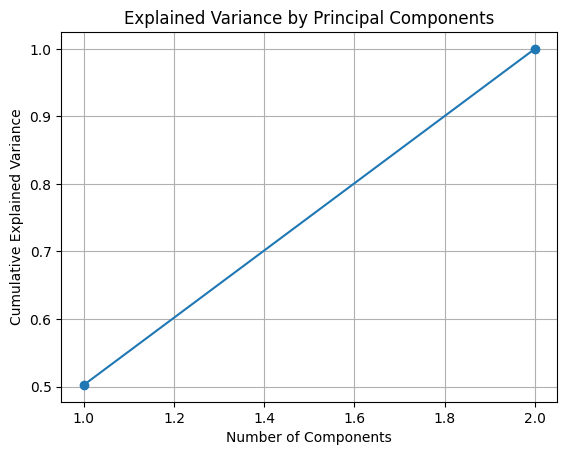

In [116]:
#Perform PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

# Subset and scale the numeric data
df_ren3_2 = df_ren3[['GENERATION (Megawatthours)', 'ENERGY SOURCE']].dropna()

# Encode categorical variables
le_country = LabelEncoder()
le_tech = LabelEncoder()
df_ren3_2['ENERGY SOURCE'] = le_tech.fit_transform(df_ren3['ENERGY SOURCE'])

X = df_ren3_2
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained
explained_variance = pca.explained_variance_ratio_
print("Variance explained by first component:", explained_variance[0])

# Plot cumulative variance
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

This didn't work. I need to add 1 more dimension along with energy source and generation to get better explanation.  Right now, PCA 1 explains only 50% of the variance, but pca 2 would explain 100% of the variance. 

Variance explained by first component: 0.5406371217944661


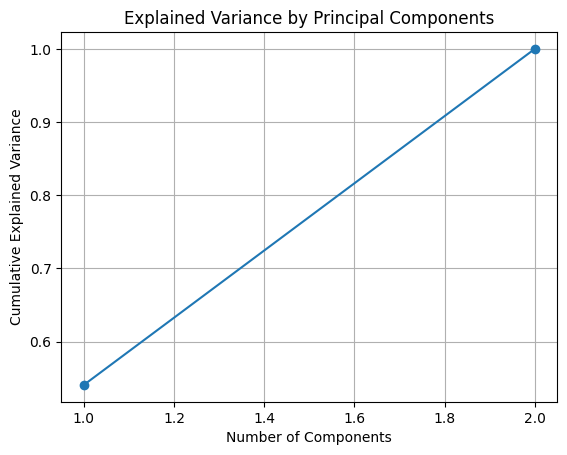

In [124]:
#Perform PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

# Subset and scale the numeric data
df_ren3_3 = df_ren3[['GENERATION (Megawatthours)', 'TYPE OF PRODUCER']].dropna()

# Encode categorical variables
le_country = LabelEncoder()
le_tech = LabelEncoder()
df_ren3_2['TYPE OF PRODUCER'] = le_tech.fit_transform(df_ren3['TYPE OF PRODUCER'])

X = df_ren3_3
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained
explained_variance = pca.explained_variance_ratio_
print("Variance explained by first component:", explained_variance[0])

# Plot cumulative variance
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

It is slightly better. I need to add 1 more dimension along with energy source and generation to get better explanation.  Right now, PCA 1 explains only 54% of the variance, but pca 2 would explain 100% of the variance. I just haven't found the additional dimension that would help. 

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

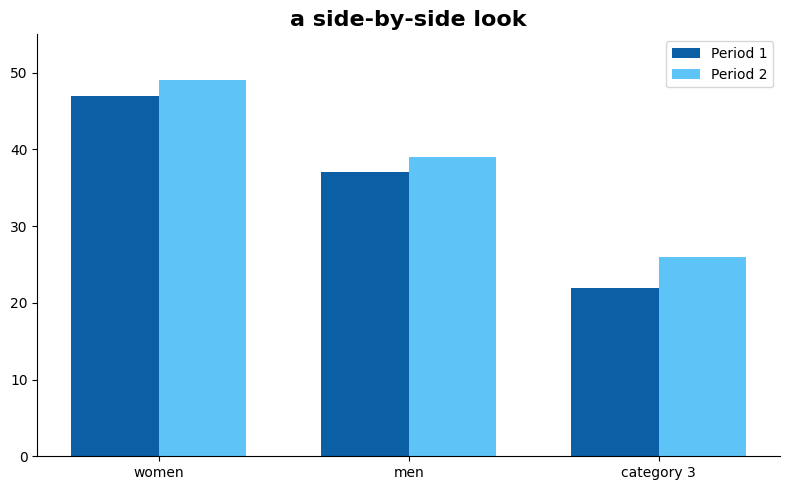

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Categories and values
categories = ['women', 'men', 'category 3']
period_1 = [47, 37, 22]
period_2 = [49, 39, 26]

x = np.arange(len(categories))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 5))

# Bars for each period
bars1 = ax.bar(x - width/2, period_1, width, label='Period 1', color='#0b5fa5')
bars2 = ax.bar(x + width/2, period_2, width, label='Period 2', color='#5ec4f8')

# Labels and formatting
ax.set_ylabel('')
ax.set_title('a side-by-side look', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 55)
ax.legend()

# Optional: Clean up spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()
